In [1]:
%matplotlib inline
from pprint import pprint
from decimal import Decimal
import itertools
import metrics
import pandas

import simulate
import harvesting
import market
import withdrawal
import numpy

In [2]:
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [3]:
series = market.Returns_US_1871()

In [4]:
TYPE = 'Withdraw Pct Cur'
m = {'Withdrawal (Nominal)': lambda x: float(x.withdraw_n),
     'Withdrawal (Real)' : lambda x: float(x.withdraw_r),
     'Portfolio (Nominal)': lambda x: float(x.portfolio_n),
     'Portfolio (Real)': lambda x: float(x.portfolio_r),
     'Withdraw Pct Cur': lambda x: float(x.withdraw_pct_cur),
}
lens = m[TYPE]
lens.__label__ = TYPE

def fn(x):
    return [lens(_) for _ in x]

In [5]:
def run_sim(year, length=30):
    portfolio = (500000,500000)
    harvest_strategy = harvesting.make_rebalancer(0.5)
    
    return simulate.withdrawals(series.iter_from(year),
                                 withdraw=lambda p, s: withdrawal.ConstantDollar(p, s, rate=Decimal('0.0325')),
                                 years=length,
                                 portfolio=portfolio,
                                 harvesting=harvest_strategy)

In [6]:
def chart_one(year):
    s = run_sim(year)
    
    df = pandas.DataFrame({
        'pmt' : [lens(x) for x in s],
        'cape' : 0.02,
    })
    g = seaborn.relplot(
            data=df,
            kind='line',
            aspect=2,
        )
    g.fig.autofmt_xdate()
    g.despine(left=True, bottom=True, offset=20)
    g.fig.suptitle(f'Retirement in {year}')
    return g

In [7]:
all_sims = {}
for year in range(1871, 1989):
    all_sims[year] = [lens(x) for x in run_sim(year)]

In [8]:
df = pandas.DataFrame(all_sims)

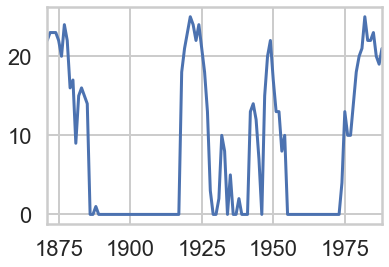

In [9]:
s = df[df <= 0.02].count()
s.plot.line()

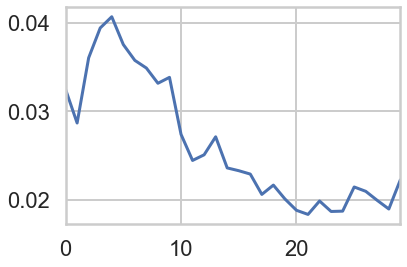

In [10]:
df.T.loc[1945].plot.line()

In [11]:
s[s > 0].median()

17.0

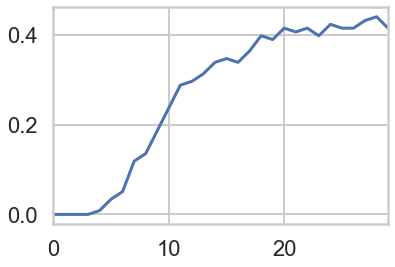

In [20]:
divs = pandas.Series(index=range(len(df)))
for i in range(len(df)):
    s = df.loc[i]
    d = s[s <= 0.02]
    divs.loc[i] = len(d) / len(s)
#    print(i, len(d), len(s))
divs.plot.line()

In [21]:
divs

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.008475
5     0.033898
6     0.050847
7     0.118644
8     0.135593
9     0.186441
10    0.237288
11    0.288136
12    0.296610
13    0.313559
14    0.338983
15    0.347458
16    0.338983
17    0.364407
18    0.398305
19    0.389831
20    0.415254
21    0.406780
22    0.415254
23    0.398305
24    0.423729
25    0.415254
26    0.415254
27    0.432203
28    0.440678
29    0.415254
dtype: float64